In [1]:
import main as main
# import pyomo.environ as pyo
import numpy as np
import matplotlib.pyplot as plt
# import pickle
from os import listdir

def plot_results_behaviour(results):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

    numloc = results['dualsT'].shape[1]
    numperiods = results['dualsT'].shape[0]
    dualgamma = results['dualgammasT'][0,0]
    
    fig.suptitle(f"Locations: {numloc}, TimePeriods: {numperiods}, DualGamma: {dualgamma}")
    ax[0,0].plot(results['obj_cost'])
    ax[0,0].set(xlabel="iteration", ylabel = 'objective value original')
    
    ax[1,1].plot(results['min_obj'])
    ax[1,1].set(xlabel="iteration", ylabel = 'minimization objective')

    for i in range(results['dualsT'].shape[1]):
        ax[0,1].plot(results['dualsT'][:,i])
        ax[0,1].set(xlabel="iteration",ylabel='dual values')

        ax[1,0].plot(results['primal_residualsT'][:,i])
        ax[1,0].set(xlabel="iteration", ylabel='primal residual')



    plt.show()
# def save_run(results):
#     i = len(listdir("Results/"))
#     with open(f'Results/results{i}.pkl', 'wb') as f:
#         pickle.dump(results, f)
#     print("done")

 > Solving RFL
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14


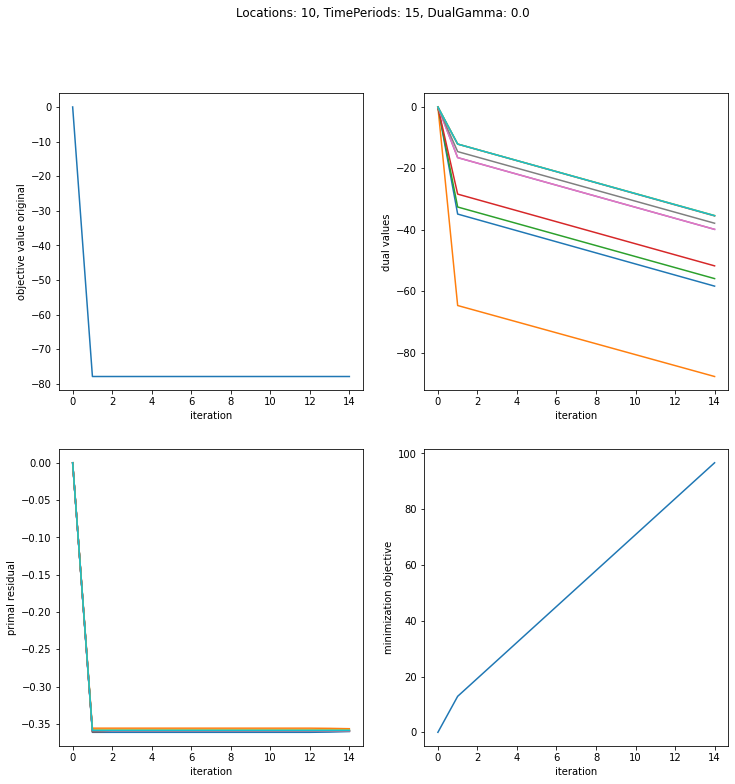

In [2]:
# main.solve_LP()
results, portfolio_instance, locations_instance, decision_vars = main.solve_RFL()
# save_run(results)

plot_results_behaviour(results)

In [ ]:
# # print(decision_vars[30]['e_G'])
# # print(decision_vars[30]['i_G'])
# import pyomo.environ as pyo
# # print(decision_vars[10]['i_G'])
# # print(decision_vars[10]['e_G'])
# I_t = []
# E_t = []
# for t in locations_instance.T:
#     I_t.append(pyo.value(locations_instance.commitment_i[t]))
#     E_t.append(pyo.value(locations_instance.commitment_e[t]))

# print(I_t)
# print(decision_vars[10]['i_G'])
# print(np.sum(decision_vars[10]['e_S'], axis=1))
# print(E_t)
# print(decision_vars[10]['e_G'])
# print(np.sum(decision_vars[10]['i_S'], axis=1))

# print(I_t[0]+decision_vars[10]['i_G'][0] + np.sum(decision_vars[10]['e_S'], axis=1)[0] - E_t[0] - decision_vars[10]['e_G'][0] - np.sum(decision_vars[10]['i_S'], axis=1)[0] )

In [1]:
import pyomo.environ as pyo
import main as main
location_instances, exports_S_TL, imports_S_TL, charge_TBL, discharge_TBL, i_G, e_G, new_dualsT, computational_data, decision_vars = main.solve_ADMM()

> Solving ADMM
   Creating Subproblem for Location 1
   Creating Subproblem for Location 2
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14


In [2]:

def check_complementarities_in_exchange_admm(exports_S_TL, imports_S_TL, charge_TBL, discharge_TBL):
    T, B, L = discharge_TBL.shape

    for l in range(L):
        for t in range(T):
            if (exports_S_TL[t,l]*imports_S_TL[t,l] != 0):
                print(exports_S_TL[t,l], "----exp/imp---",imports_S_TL[t,l] )
            
            for b in range(B):
                if (charge_TBL[t,b,l]*discharge_TBL[t,b,l] != 0):
                    print(charge_TBL[t,b,l], "---- charge/dis ---- ", discharge_TBL[t,b,l])

check_complementarities_in_exchange_admm(exports_S_TL, imports_S_TL, charge_TBL, discharge_TBL)

In [6]:
computational_data['primal_residualsT'][:,4]

array([0.        , 0.00101516, 0.00101516, 0.00101565, 0.00101565,
       0.00101565, 0.00101565, 0.00101565, 0.00101565, 0.00101516,
       0.00101516, 0.00101516, 0.00101516, 0.00101516, 0.00101516])